## Work
請結合前面的知識與程式碼，比較不同的 regularization 的組合對訓練的結果與影響：如 dropout, regularizers, batch-normalization 等

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

C:\ProgramData\Anaconda3\envs\tensorflow_cpu\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization,Dropout
from keras.regularizers import l1, l2, l1_l2

In [6]:
# # Hint 1 : 在 Dense 層中增加 Regularizers
# # Hint 2 : 增加 Dropout 層並設定 dropout ratio 
# # Hint 3 : 增加 Batch-normalization 層
# def build_mlp():
#     """
#     Build your own model
#     """
#     return model
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2,l1_ratio=0.001):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1(l1_ratio))(input_layer)
            x = Dropout(drp_ratio)(x)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1(l1_ratio))(x)
            x = Dropout(drp_ratio)(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [7]:
## 超參數設定
# """
# Set your hyper-parameters
# """
LEARNING_RATE = 1e-3
EPOCHS = 10
BATCH_SIZE = [128,256]
Dropout_EXP = [0.1,0.25]
l1_EXP=[0.0001,1e-8]

In [8]:
# results = {}
# """
# Write your training loop and record results
# """
results = {}
for batch in BATCH_SIZE:
    for drop in Dropout_EXP:
        for l in l1_EXP:
            keras.backend.clear_session()
            print(f"Experiment with L1_ratio {l} drop out ratio {drop} batch size {batch}")
            model=build_mlp(input_shape=x_train.shape[1:], l1_ratio=l, drp_ratio=drop)
            model.summary()
            optimizer = keras.optimizers.SGD(lr=LEARNING_RATE)
            model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
            model.fit(x_train, y_train, epochs=EPOCHS, batch_size=batch, validation_data=(x_test, y_test), shuffle=True)
            
            train_loss = model.history.history["loss"]
            valid_loss = model.history.history["val_loss"]
            train_acc = model.history.history["acc"]
            valid_acc = model.history.history["val_acc"]
            
            exp_name_tag = f"l1-{l}-drop-{drop}-batch-{batch}"
            results[exp_name_tag]={'train_loss':train_loss, "valid_loss":valid_loss, "train_acc":train_acc, "valid_acc":valid_acc}

Experiment with L1_ratio 0.0001 drop out ratio 0.1 batch size 128
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
batch_norm

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 25s 508us/step - loss: 6.7220 - acc: 0.1553 - val_loss: 6.1212 - val_acc: 0.2580
Epoch 2/10
50000/50000 [==============================] - 24s 474us/step - loss: 6.4302 - acc: 0.2125 - val_loss: 5.9600 - val_acc: 0.3035
Epoch 3/10
50000/50000 [==============================] - 24s 481us/step - loss: 6.2911 - acc: 0.2414 - val_loss: 5.8641 - val_acc: 0.3329
Epoch 4/10
50000/50000 [==============================] - 24s 478us/step - loss: 6.2011 - acc: 0.2605 - val_loss: 5.8079 - val_acc: 0.3522
Epoch 5/10
50000/50000 [==============================] - 24s 480us/step - loss: 6.1257 - acc: 0.2738 - val_loss: 5.7622 - val_acc: 0.3567
Epoch 6/10
50000/50000 [==============================] - 24s 475us/step - loss: 6.0660 - acc: 0.2878 - val_loss: 5.7272 - val_acc: 0.3734
Epoch 7/10
50000/50000 [==============================] - 24s 487us/step - loss: 6.0170 - acc: 0.2992 - val_loss: 5.

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 19s 373us/step - loss: 2.5923 - acc: 0.1795 - val_loss: 2.1438 - val_acc: 0.2672
Epoch 2/10
50000/50000 [==============================] - 17s 349us/step - loss: 2.2919 - acc: 0.2494 - val_loss: 1.9875 - val_acc: 0.3058
Epoch 3/10
50000/50000 [==============================] - 17s 346us/step - loss: 2.1697 - acc: 0.2767 - val_loss: 1.8945 - val_acc: 0.3291
Epoch 4/10
50000/50000 [==============================] - 17s 343us/step - loss: 2.0865 - acc: 0.2966 - val_loss: 1.8451 - val_acc: 0.3454
Epoch 5/10
50000/50000 [==============================] - 17s 341us/step - loss: 2.0280 - acc: 0.3092 - val_loss: 1.8040 - val_acc: 0.3593
Epoch 6/10
50000/50000 [==============================] - 17s 342us/step - loss: 1.9788 - acc: 0.3244 - val_loss: 1.7714 - val_acc: 0.3721
Epoch 7/10
50000/50000 [==============================] - 17s 337us/step - loss: 1.9500 - acc: 0.3352 - val_loss: 1.

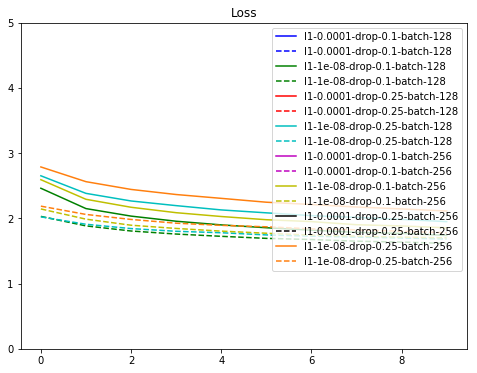

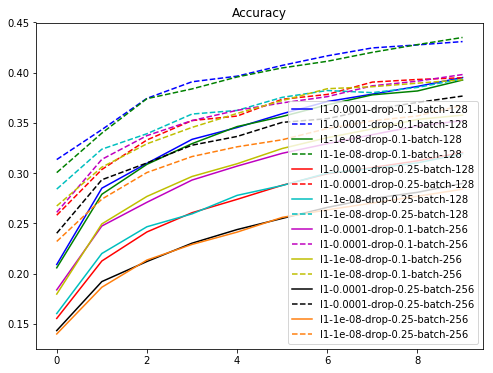

In [9]:
# import matplotlib.pyplot as plt
# %matplotlib inline

# """
# Plot results
# """

import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'C1']

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_loss'])),results[cond]['train_loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid_loss'])),results[cond]['valid_loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_acc'])),results[cond]['train_acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid_acc'])),results[cond]['valid_acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()